<a href="https://colab.research.google.com/github/RushilPatel0703/ACML_Project/blob/main/ACML_Project_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

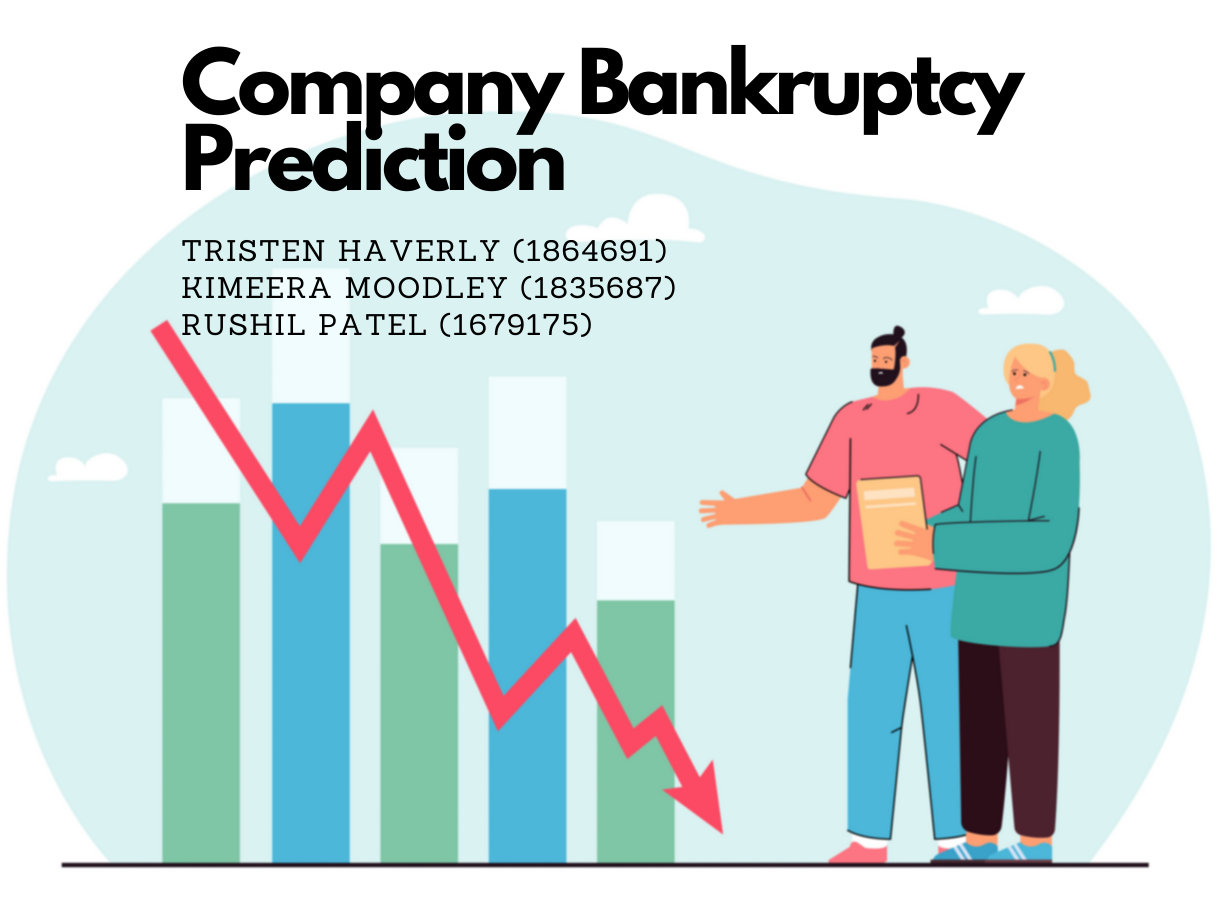

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import rcParams
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# for importing data that is already on our github repo https://github.com/RushilPatel0703/ACML_Project
url = 'https://raw.githubusercontent.com/RushilPatel0703/ACML_Project/main/data.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
X = data.drop('Bankrupt?',axis=1)
y = data['Bankrupt?']

In [ ]:
# splitting the data where 20% is used for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
#to get the important features and unimportant features
features = RandomForestClassifier(n_estimators = 150) 

In [ ]:
features.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
y_pred = features.predict(X_test)

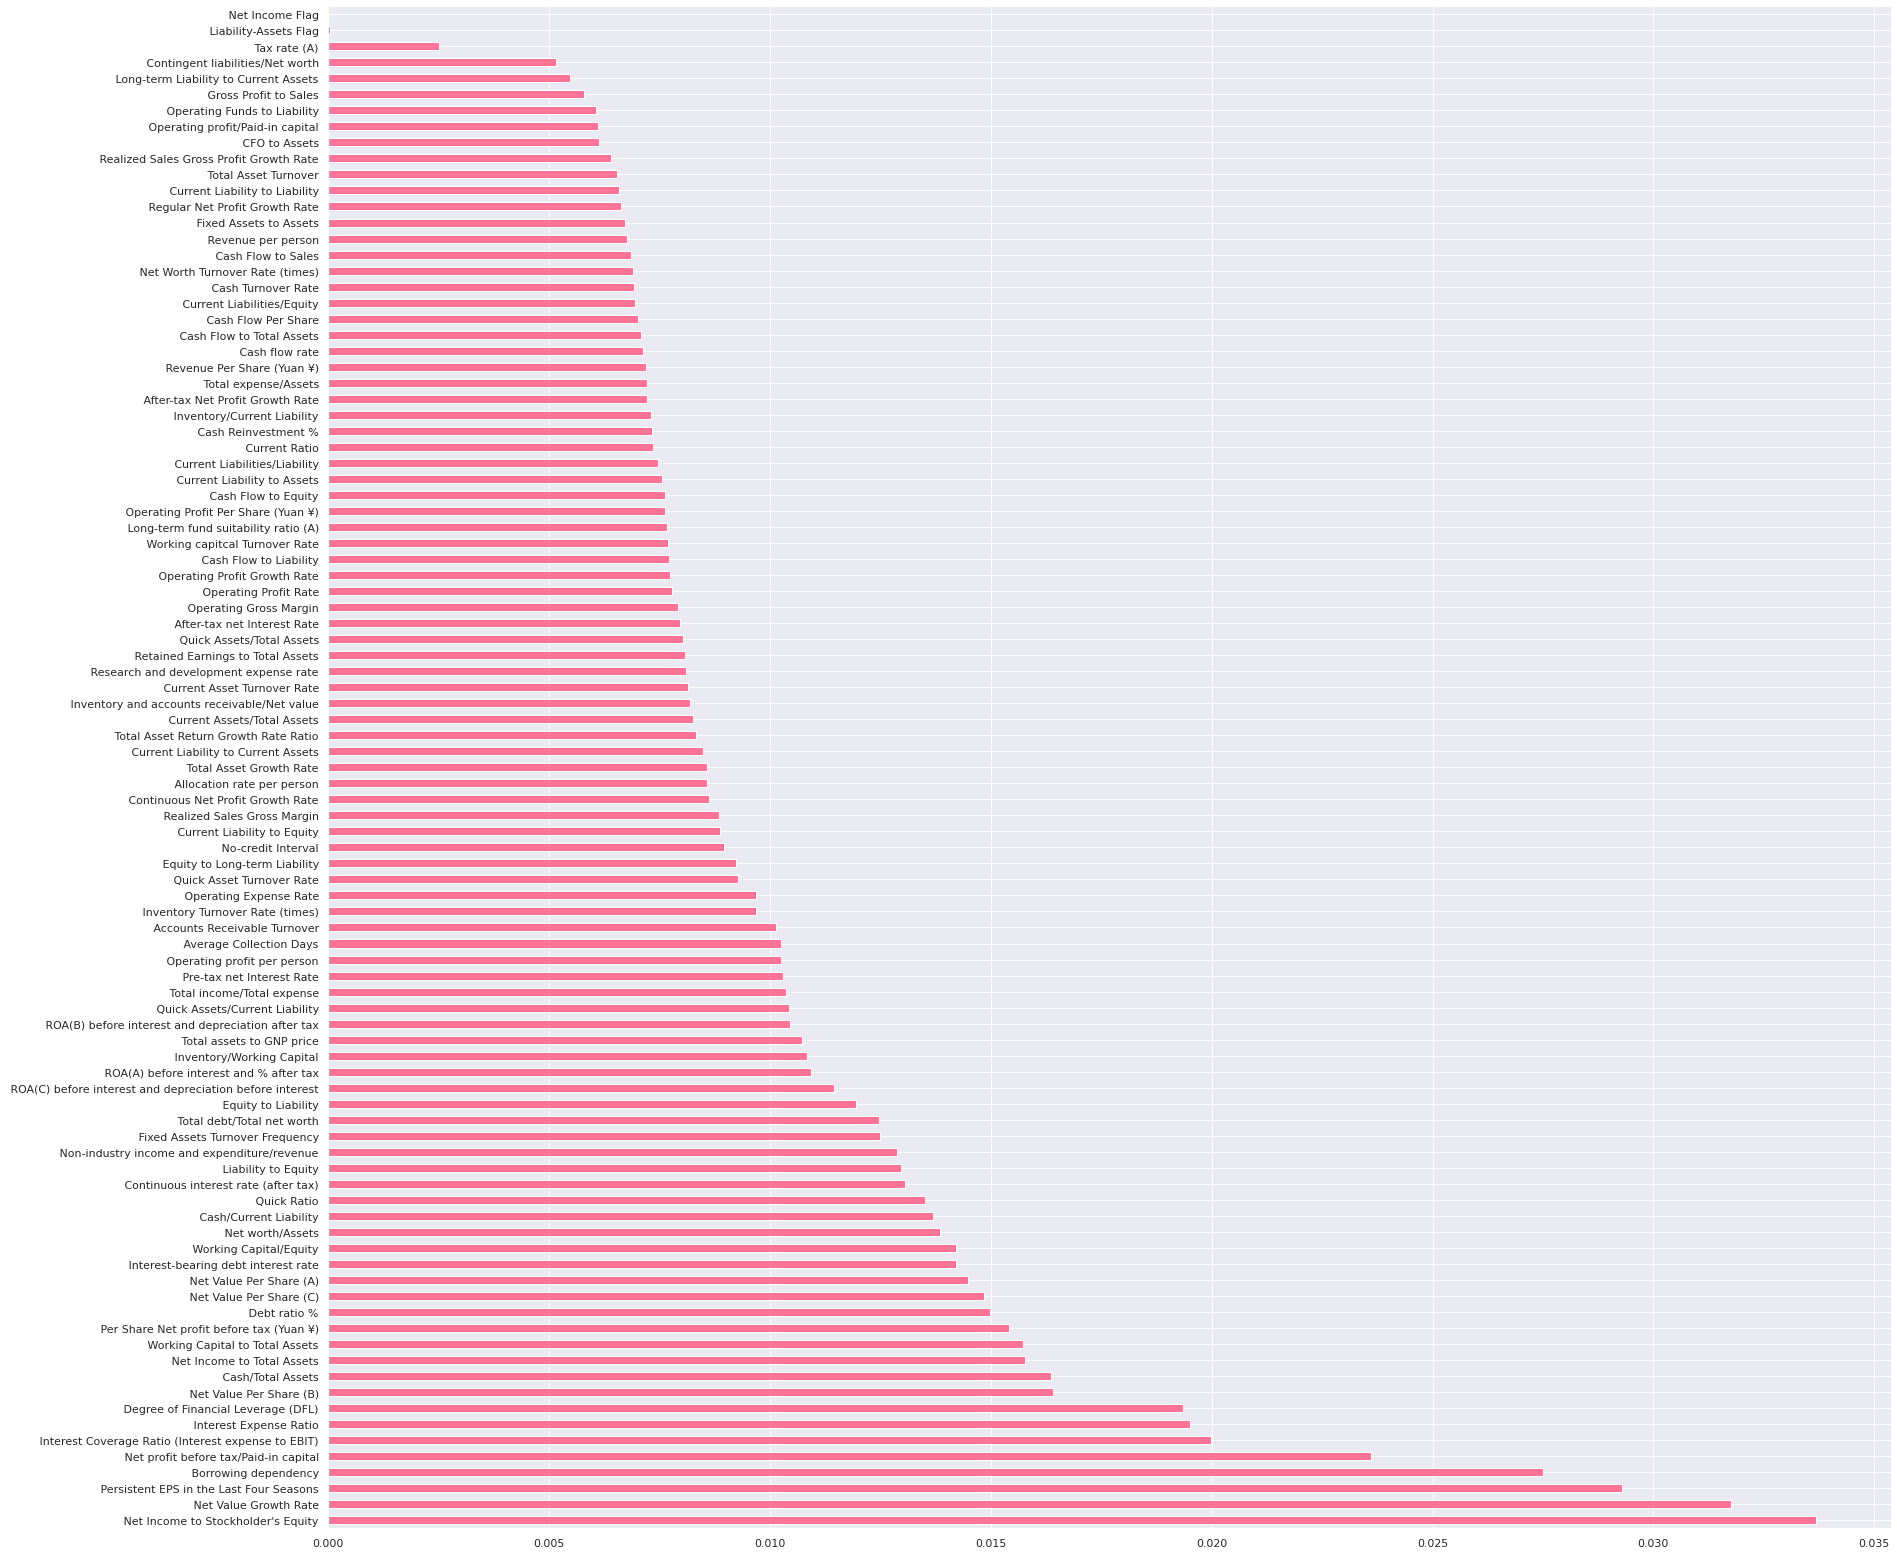

In [ ]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
feature_imp = pd.Series(features.feature_importances_, index = data.columns[1:]).sort_values(ascending = False)
feature_imp.plot(kind='barh', color='#FF7396')
plt.rcParams["figure.figsize"] = (28,28)

In [ ]:
# we only usinf the top 32 features and not the full 96 features
new_data = data[[' Net Value Growth Rate',
                ' Borrowing dependency',
                ' Persistent EPS in the Last Four Seasons',
                ' Cash/Total Assets',
                ' Net profit before tax/Paid-in capital',
                ' Non-industry income and expenditure/revenue',
                ' Net worth/Assets',
                ' Equity to Liability',
                ' Total debt/Total net worth',
                ' Degree of Financial Leverage (DFL)',
                ' Fixed Assets Turnover Frequency',
                ' Interest Expense Ratio',
                ' Cash/Current Liability',
                ' Interest Coverage Ratio (Interest expense to EBIT)',
                ' Inventory/Working Capital',
                ' Debt ratio %',
                ' Net Income to Total Assets',
                ' Interest-bearing debt interest rate',
                ' Working Capital/Equity',
                ' Working Capital to Total Assets',
                ' Net Value Per Share (A)',
                ' Net Value Per Share (C)',
                ' Continuous interest rate (after tax)',
                ' ROA(B) before interest and depreciation after tax',
                ' Accounts Receivable Turnover',
                ' Net Value Per Share (B)',
                ' Total Asset Return Growth Rate Ratio',
                ' Per Share Net profit before tax (Yuan ¥)',
                ' Quick Ratio',
                ' Operating Expense Rate',
                ' No-credit Interval',
                ' ROA(C) before interest and depreciation before interest']]

In [ ]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Net Value Growth Rate,6819.0,1.566212e+06,1.141594e+08,0.0,0.000441,0.000462,4.993621e-04,9.330000e+09
Borrowing dependency,6819.0,3.746543e-01,1.628616e-02,0.0,0.370168,0.372624,3.762707e-01,1.000000e+00
Persistent EPS in the Last Four Seasons,6819.0,2.288129e-01,3.326261e-02,0.0,0.214711,0.224544,2.388201e-01,1.000000e+00
Cash/Total Assets,6819.0,1.240946e-01,1.392506e-01,0.0,0.033543,0.074887,1.610732e-01,1.000000e+00
Net profit before tax/Paid-in capital,6819.0,1.827150e-01,3.078477e-02,0.0,0.169376,0.178456,1.916070e-01,1.000000e+00
Non-industry income and expenditure/revenue,6819.0,3.036229e-01,1.116344e-02,0.0,0.303466,0.303525,3.035852e-01,1.000000e+00
Net worth/Assets,6819.0,8.868229e-01,5.392031e-02,0.0,0.851196,0.888593,9.271095e-01,1.000000e+00
Equity to Liability,6819.0,4.757836e-02,5.001372e-02,0.0,0.024477,0.033798,5.283782e-02,1.000000e+00
Total debt/Total net worth,6819.0,4.416337e+06,1.684069e+08,0.0,0.003007,0.005546,9.273293e-03,9.940000e+09
Degree of Financial Leverage (DFL),6819.0,2.754112e-02,1.566794e-02,0.0,0.026791,0.026808,2.691318e-02,1.000000e+00


In [ ]:
X_new = new_data

In [ ]:
# we split our new data set with less features and 25% of the data is used for testing
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y,test_size=0.25) #splitting the data

## Random Forest Classifier Parameter tuning

In [ ]:
# These lists store the accuracies outputed from every iteration of the for loop for every model
accuracy1 = []
accuracy2 = []
accuracy3 = []
accuracy4 = []
accuracy5 = []
accuracy6 = []
accuracy7 = []
estimators = [10,50,60,90,100,150,200,250,300,400]

In [ ]:
# Here 7 different variations of Random Forest is created with different parameters
# These seven models loop over different values of estimators, which is the number of trees in the forest

# Model 1
for i in range(0,10):
    clf_loop1 = RandomForestClassifier(n_estimators = estimators[i])
    clf_loop1.fit(X_train_new, y_train_new)
    y_pred_loop1 = clf_loop1.predict(X_test_new)
    accuracy1.append(metrics.accuracy_score(y_test_new, y_pred_loop1)*100)

# Model 2
for i in range(0,10):
    clf_loop2 = RandomForestClassifier(n_estimators = estimators[i],criterion='entropy')
    clf_loop2.fit(X_train_new, y_train_new)
    y_pred_loop2 = clf_loop2.predict(X_test_new)
    accuracy2.append(metrics.accuracy_score(y_test_new, y_pred_loop2)*100)

# Model 3
for i in range(0,10):
    clf_loop3 = RandomForestClassifier(n_estimators = estimators[i],criterion='entropy',max_features='sqrt')
    clf_loop3.fit(X_train_new, y_train_new)
    y_pred_loop3 = clf_loop3.predict(X_test_new)
    accuracy3.append(metrics.accuracy_score(y_test_new, y_pred_loop3)*100)

# Model 4
for i in range(0,10):
    clf_loop4 = RandomForestClassifier(n_estimators = estimators[i],criterion='gini')
    clf_loop4.fit(X_train_new, y_train_new)
    y_pred_loop4 = clf_loop4.predict(X_test_new)
    accuracy4.append(metrics.accuracy_score(y_test_new, y_pred_loop4)*100)

# Model 5
for i in range(0,10):
    clf_loop5 = RandomForestClassifier(n_estimators = estimators[i],criterion='gini',max_features='sqrt')
    clf_loop5.fit(X_train_new, y_train_new)
    y_pred_loop5 = clf_loop5.predict(X_test_new)
    accuracy5.append(metrics.accuracy_score(y_test_new, y_pred_loop5)*100)

# Model 6
for i in range(0,10):
    clf_loop6 = RandomForestClassifier(n_estimators = estimators[i],criterion='gini',max_features='log2')
    clf_loop6.fit(X_train_new, y_train_new)
    y_pred_loop6 = clf_loop6.predict(X_test_new)
    accuracy6.append(metrics.accuracy_score(y_test_new, y_pred_loop6)*100)

# Model 7
for i in range(0,10):
    clf_loop7 = RandomForestClassifier(n_estimators = estimators[i],criterion='entropy',max_features='log2')
    clf_loop7.fit(X_train_new, y_train_new)
    y_pred_loop7 = clf_loop7.predict(X_test_new)
    accuracy7.append(metrics.accuracy_score(y_test_new, y_pred_loop7)*100)        

In [ ]:
# To get the average accuracies for each of the 7 Models
clf1 = sum(accuracy1)/10
clf2 = sum(accuracy2)/10
clf3 = sum(accuracy3)/10
clf4 = sum(accuracy4)/10
clf5 = sum(accuracy5)/10
clf6 = sum(accuracy6)/10
clf7 = sum(accuracy7)/10

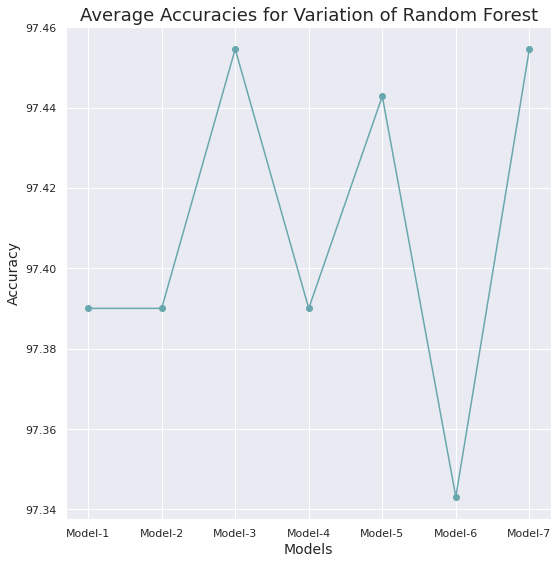

In [ ]:
plt.plot(['Model-1','Model-2','Model-3','Model-4','Model-5','Model-6','Model-7'],[clf1,clf2,clf3,clf4,clf5,clf6,clf7], marker='o', color='#68A7AD')
plt.rcParams["figure.figsize"] = (8,8)
plt.title('Average Accuracies for Variation of Random Forest', fontsize=18)
plt.xlabel('Models',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.tight_layout()

In [ ]:
print([clf1,clf2,clf3,clf4,clf5,clf6,clf7]) # Actual average values

[97.3900293255132, 97.3900293255132, 97.45454545454545, 97.39002932551318, 97.44281524926686, 97.34310850439883, 97.45454545454544]


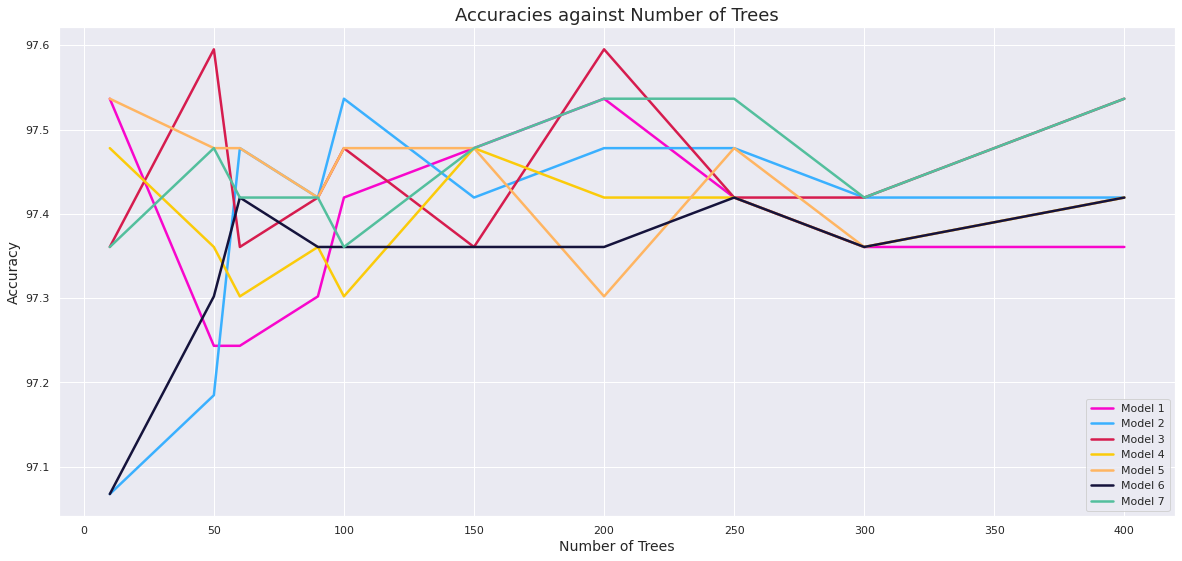

In [ ]:
# we notice here that more number of trees does not necessarily mean better accuracy
plt.plot(estimators,accuracy1,color='#F806CC', label='Model 1', linewidth=2.5)
plt.plot(estimators,accuracy2,color='#3AB0FF', label='Model 2', linewidth=2.5)
plt.plot(estimators,accuracy3,color='#D61C4E', label='Model 3', linewidth=2.5)
plt.plot(estimators,accuracy4,color='#FBCB0A', label='Model 4', linewidth=2.5)
plt.plot(estimators,accuracy5,color='#FFB562', label='Model 5', linewidth=2.5)
plt.plot(estimators,accuracy6,color='#15133C', label='Model 6', linewidth=2.5)
plt.plot(estimators,accuracy7,color='#53BF9D', label='Model 7', linewidth=2.5)

plt.title('Accuracies against Number of Trees', fontsize=18)
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Number of Trees',fontsize=14)
plt.legend(loc="lower right")

plt.rcParams["figure.figsize"] = (20,9)

## Naive Bayes Parameter Tuning (Bernoulli and Gaussian)

In [ ]:
alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] # to be used in Bernoulli Naive Bayes 
variables = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]# to be used in Gaussian Naive Bayes
predictions1=[] # for Bernoulli Naive Bayes 
predictions2=[] # for Gaussian Naive Bayes 

In [ ]:
# The data needs to be standardized for Naive Bayes
sc_X = StandardScaler() 
X_trainNb = sc_X.fit_transform(X_train_new)
X_testNb = sc_X.fit_transform(X_test_new)

In [ ]:
# Here 2 different variations of Naive Bayes is created with different parameters
# Model 1
for i in range(0,10):
    Bnb_classifier = BernoulliNB(alpha=alphas[i],fit_prior=True)
    Bnb_classifier.fit(X_trainNb, y_train_new)
    y_predBnb = Bnb_classifier.predict(X_testNb)
    predictions1.append(metrics.accuracy_score(y_test_new, y_predBnb)*100)

# Model 2
for i in range(0,10):
    Gnb_classifier = GaussianNB(var_smoothing = variables[i])
    Gnb_classifier.fit(X_trainNb, y_train_new)
    y_predGnb = Gnb_classifier.predict(X_testNb)
    predictions2.append(metrics.accuracy_score(y_test_new, y_predGnb)*100)

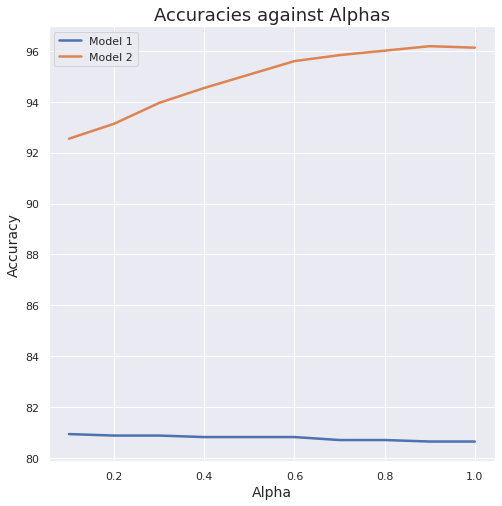

In [ ]:
plt.plot(alphas,predictions1, label='Model 1', linewidth=2.5)
plt.plot(variables,predictions2, label='Model 2', linewidth=2.5)

plt.title('Accuracies against Alphas', fontsize=18)
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Alpha',fontsize=14)
plt.legend(loc="upper left")

plt.rcParams["figure.figsize"] = (8,8)

In [ ]:
#Average Accuracies per model
p1 = sum(predictions1)/len(predictions1)
p2 = sum(predictions2)/len(predictions2)
print(p1)
print(p2)

80.78592375366568
94.90322580645162


## Logistic Regression

In [ ]:
# These lists store the accuracies outputed from every iteration of the for loop for every model

iterations = [100,150,200,300,400,700] # number of iterations
acc1 = []
acc2 = []
acc3 = []
acc4 = []

In [ ]:
# Here 4 different variations of logistic regression is created with different parameters
# The 4 models with different parameters are looped over different number of iterations ranging from 100 - 700 iterations

# Model 1
for i in range(0,6):
    lrmodel1 = LogisticRegression(penalty ='l2',C = 0.1, solver='lbfgs',max_iter=iterations[i])
    lrmodel1.fit(X_trainNb, y_train_new)
    y_predLR1 = lrmodel1.predict(X_testNb)
    acc1.append(metrics.accuracy_score(y_test_new, y_predLR1)*100)

# Model 2
for i in range(0,6):
    lrmodel2 = LogisticRegression(penalty ='l2',C = 0.1, solver='liblinear',max_iter=iterations[i])
    lrmodel2.fit(X_trainNb, y_train_new)
    y_predLR2 = lrmodel2.predict(X_testNb)
    acc2.append(metrics.accuracy_score(y_test_new, y_predLR2)*100)

# Model 3
for i in range(0,6):
    lrmodel3 = LogisticRegression(penalty ='l2',C = 1, solver='saga',max_iter=iterations[i])
    lrmodel3.fit(X_trainNb, y_train_new)
    y_predLR3 = lrmodel3.predict(X_testNb)
    acc3.append(metrics.accuracy_score(y_test_new, y_predLR3)*100)

# Model 4
for i in range(0,6):
    lrmodel4 = LogisticRegression(penalty ='l2',C = 0.01, solver='newton-cg',max_iter=iterations[i])
    lrmodel4.fit(X_trainNb, y_train_new)
    y_predLR4 = lrmodel4.predict(X_testNb)
    acc4.append(metrics.accuracy_score(y_test_new, y_predLR4)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [ ]:
# Average accuracies for each of the 4 models
a1 = sum(acc1)/len(acc1)
a2 = sum(acc2)/len(acc2)
a3 = sum(acc3)/len(acc3)
a4 = sum(acc4)/len(acc4)

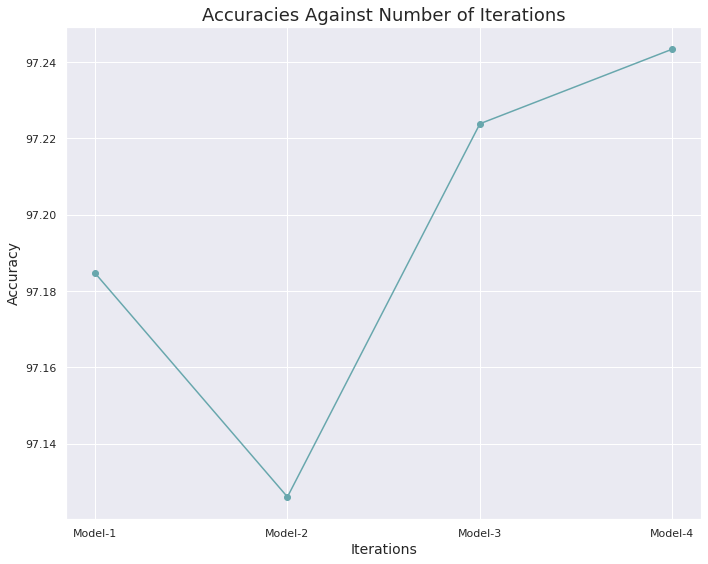

In [ ]:
plt.plot(['Model-1','Model-2','Model-3','Model-4'],[a1,a2,a3,a4], marker='o', color='#68A7AD')

plt.title( 'Accuracies Against Number of Iterations', fontsize=18)
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Iterations',fontsize=14)

plt.rcParams["figure.figsize"] = (8,8)
plt.tight_layout()

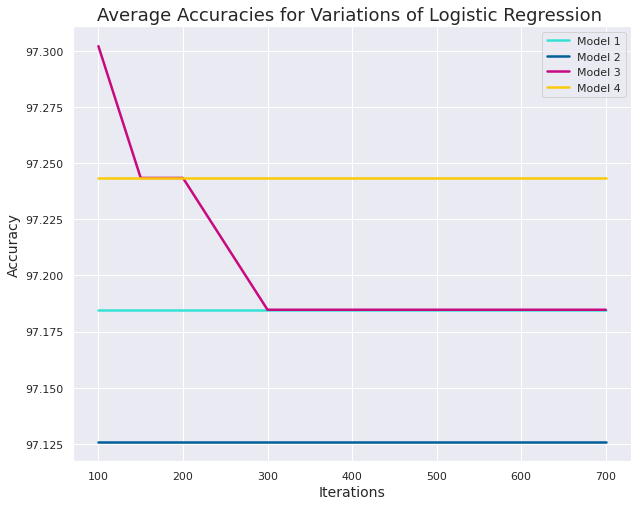

In [ ]:
plt.plot(iterations,acc1, color='#37E2D5', label='Model 1', linewidth=2.5)
plt.plot(iterations,acc2, color='#005F99', label='Model 2', linewidth=2.5)
plt.plot(iterations,acc3, color='#C70A80', label='Model 3', linewidth=2.5)
plt.plot(iterations,acc4, color='#FBCB0A', label='Model 4', linewidth=2.5)

plt.title('Average Accuracies for Variations of Logistic Regression ', fontsize=18)
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Iterations',fontsize=14)
plt.legend(loc='upper right')

plt.rcParams["figure.figsize"] = (10,8)

## Metrics for the best perfoming configuration of each Model

### Random Forest

In [ ]:
bestRF = RandomForestClassifier(n_estimators = 150,criterion='gini') #The Best parameters for Random Forest for our dataset
bestRF.fit(X_train_new, y_train_new)
bestRF_y_pred = bestRF.predict(X_test_new)

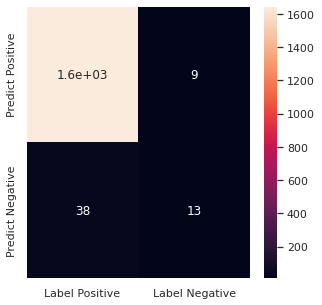

In [ ]:
# we show the confusion matrix
cm1 = confusion_matrix(y_test_new, bestRF_y_pred)
sns.heatmap(cm1, annot=True, xticklabels=['Label Positive','Label Negative'], yticklabels=['Predict Positive','Predict Negative'])
sns.set(rc = {'figure.figsize':(5,5)})

In [ ]:
print(classification_report(y_test_new, bestRF_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1654
           1       0.59      0.25      0.36        51

    accuracy                           0.97      1705
   macro avg       0.78      0.62      0.67      1705
weighted avg       0.97      0.97      0.97      1705



### Naive Bayes (Gaussian)

In [ ]:
bestNB = GaussianNB(var_smoothing = 1) #The best parameters for Naive Bayes for our dataset
bestNB.fit(X_trainNb, y_train_new)
bestNB_y_pred = bestNB.predict(X_testNb)

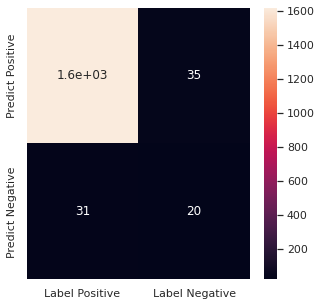

In [ ]:
# we show the confusion matrix
cm2 = confusion_matrix(y_test_new, bestNB_y_pred)
sns.heatmap(cm2, annot=True, xticklabels=['Label Positive','Label Negative'], yticklabels=['Predict Positive','Predict Negative'])
sns.set(rc = {'figure.figsize':(5,5)})

In [ ]:
print(classification_report(y_test_new, bestNB_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1654
           1       0.36      0.39      0.38        51

    accuracy                           0.96      1705
   macro avg       0.67      0.69      0.68      1705
weighted avg       0.96      0.96      0.96      1705



### Logistic Regression

In [ ]:
bestLR = LogisticRegression(penalty ='l2',C = 0.01, solver='newton-cg',max_iter=200) #The best parameters for Logistic Regression for our dataset
bestLR.fit(X_trainNb, y_train_new)
bestLR_y_pred = bestLR.predict(X_testNb)

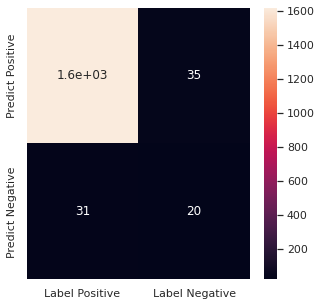

In [ ]:
# we show the confusion matrix
cm3 = confusion_matrix(y_test_new, bestLR_y_pred)
sns.heatmap(cm2, annot=True, xticklabels=['Label Positive','Label Negative'], yticklabels=['Predict Positive','Predict Negative'])

In [ ]:
print(classification_report(y_test_new, bestLR_y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1654
           1       0.67      0.16      0.25        51

    accuracy                           0.97      1705
   macro avg       0.82      0.58      0.62      1705
weighted avg       0.97      0.97      0.96      1705

